<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="400" height="600" /> 
    
    
##  Optimización Montecarlo
    
### Portafolios de Inversión

    Mtro. Sean Nicolás González Vázquez
    

---

###  1.- Métodos de Montecarlo

El método de Montecarlo es una técnica de simulación probabilística que se utiliza para resolver problemas matemáticos complejos a través de la generación de muestras aleatorias. En finanzas, ayuda a modelar problemas con  incertidumbre y estimar el comportamiento futuro de variables aleatorias.

#### Desarrollo.

<img style="float: right; margin: 20px 15px 15px 15px;" src="https://tse4.mm.bing.net/th/id/OIP.P_FTmnTsbn0SXovzficpIwAAAA?rs=1&pid=ImgDetMain" width="400" height="600" /> 
  
  
El método de Montecarlo fue desarrollado durante la década de 1940 por los matemáticos **Stanislaw Ulam**, **John von Neumann**, y **Nicholas Metropolis**, quienes trabajaban en el proyecto Manhattan. Ulam, al intentar calcular la probabilidad de ganar en un solitario, concibió la idea de usar simulaciones aleatorias. Von Neumann y Metropolis ayudaron a formalizar el método utilizando computadoras. 

El nombre "Montecarlo" se debe al famoso casino de Montecarlo en Mónaco, un destino reconocido por su asociación con juegos de azar y apuestas. Esta relación simbólica con el azar fue la razón por la cual Stanislaw Ulam eligió este nombre para la técnica, ya que en su esencia, el método de Montecarlo se basa en la aleatoriedad y el uso de variables probabilísticas para resolver problemas complejos.


$\hspace{5cm}$

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://www.researchgate.net/publication/351332960/figure/fig2/AS:1019971807236106@1620191637218/The-orbital-diagram-of-system-8.png" width="400" height="600" /> 


  
    
    
La base matemática fundamental del método de Montecarlo radica en la **Ley de los Grandes Números**, un teorema clave en la teoría de probabilidad que establece que, al incrementar el número de muestras aleatorias de un proceso estocástico, el promedio de esos resultados converge al valor esperado del proceso. Esta ley fue formalizada por Jacob Bernoulli en el siglo XVII y es esencial para el enfoque probabilístico que subyace en Montecarlo.

#### Aplicaciones en Finanzas:

*Valoración de Opciones y Derivados:*
   El método se emplea para valorar instrumentos derivados, modelando el precio futuro del activo subyacente y estimando su valor bajo diversas trayectorias de precios.

*Gestión de Riesgos:*
   Montecarlo permite simular la evolución de un portafolio bajo distintos escenarios, facilitando el cálculo de métricas de riesgo como el Valor en Riesgo (VaR) y la Pérdida Esperada (Expected Shortfall, ES).

*Asset Allocation:*
   Permite optimizar portafolios, buscando las ponderaciones eficientes por medio de la simulación de las múltiples combinaciones de los activos.

#### Ventajas.

- **Flexibilidad:** Montecarlo puede aplicarse a una amplia variedad de problemas financieros que involucren incertidumbre.
- **Capacidad para manejar procesos complejos:** Permite la modelización de procesos estocásticos complejos.
- **Simplicidad:** El método es sencillo en su ejecución y modelización.

#### Desventajas.

+ **Consumo de Recursos Computacionales:** El método de montecarlo implica un alto costo computacional, en específico de memoria RAM, debido a la cantidad de simulaciones que puede necesitar para converger,

+ **Dependencia en la Calidad de las Suposiciones:** Garbage In Garbage Out.

+ **Dificultad para Evaluar la Convergencia:** El número de simulaciones para que el problema converja es *relativo* al problema, además, puede ser que el método no converja a un mínimo global, si no a uno local.

---
### 2.- Optimización Montecarlo

La optimización de Montecarlo combina la simulación estocástica con teoría de optimización para identificar la mejor solución entre un conjunto de opciones. Este enfoque es particularmente útil en situaciones donde:

+ Las funciones objetivo son no lineales, no convexas o difíciles de evaluar.
+ Existen múltiples variables de decisión.
+ Hay incertidumbre en los datos o en el comportamiento del sistema.

El método de Montecarlo permite explorar el espacio de soluciones al generar múltiples escenarios posibles a través de simulaciones aleatorias, proporcionando así una base para evaluar y comparar diferentes opciones.

**Pasos para Realizar una Optimización con Montecarlo**

1.- **Definir el Problema:** Identificar claramente el objetivo de la optimización y las restricciones que se deben considerar. Esto incluye la función objetivo que se desea maximizar o minimizar.

2.- **Definir las Variables:** Especificar las variables de decisión, su rango de valores y una función de distribución de probabilidad. Estas variables son las que se simularan aleatoriamente y se ajustarán para encontrar la mejor solución.

3.- **Generar un número grande de escenarios aleatorios:** Generar muestras aleatorias para cada variable de decisión.


4.- **Evaluar Resultados:** Para cada escenario (o variable) simulado, calcular el valor de la función objetivo y almacenar estos resultados. Esto puede incluir calcular métricas relevantes como el retorno esperado, el riesgo, etc.


5.- **Realizar la Optimización:** Analizar los resultados obtenidos de las simulaciones. Identificar la mejor solución (solución óptima) tanto de la función objetivo, como de las variables de decisión.



    Con este contexto, busquemos el portafolio óptimo en mínima varianza y máximo de Sharpe con montecarlo.....

---
### <font color='navy'> 3.- Descarga de Datos Iniciales y Rendimiento y Riesgo Individual

In [90]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [91]:
# Descargar precios del mismo portafolio de la tarea 3
prices=yf.download(['LLY', 'NVDA', 'MSFT', 'KXI'], 
                   start='2018-01-01', end='2025-06-11', progress=False)['Close']
prices.head()

Ticker,KXI,LLY,MSFT,NVDA
Date,,,,
2018-01-02,43.904785,75.427605,79.328529,4.929087
2018-01-03,43.908939,75.837341,79.697716,5.253487
2018-01-04,44.004658,76.175812,80.399170,5.281181
2018-01-05,44.287647,77.111099,81.395973,5.325935
2018-01-08,44.270996,76.719170,81.479034,5.489124


In [92]:
# Calcular rendimientos diarios
rets = prices.pct_change().dropna()
rets.head()

Ticker,KXI,LLY,MSFT,NVDA
Date,,,,
2018-01-03,0.000095,0.005432,0.004654,0.065813
2018-01-04,0.002180,0.004463,0.008801,0.005272
2018-01-05,0.006431,0.012278,0.012398,0.008474
2018-01-08,-0.000376,-0.005083,0.001020,0.030641
2018-01-09,-0.002068,-0.000812,-0.000680,-0.000270


In [93]:
# Calcular rendimiento promedio
rets_mean = rets.mean()

In [94]:
# Calcular matriz de covarianza
cov = rets.cov()
cov.head()

Ticker,KXI,LLY,MSFT,NVDA
Ticker,,,,
KXI,0.000087,0.000076,0.000097,0.000111
LLY,0.000076,0.000381,0.000122,0.000158
MSFT,0.000097,0.000122,0.000334,0.000403
NVDA,0.000111,0.000158,0.000403,0.001092


In [95]:
# Definir el número de activos
n_assets = len(rets.keys())
n_assets

4

---

### 4.- Portafolio Eficiente en Mínima Varianza con Montecarlo

In [96]:
# Identificar variable de decision y su distribucion, generar muestras aleatorias 




# Numero de simulaciones
n_simulacions = 10000

# Generar pesos 
weights = np.random.dirichlet(np.ones(n_assets), n_simulacions)

In [97]:
# Para cada conjunto de pesos por portafolio, obtener varianza
var_list=[w.T @ cov @ w for w in weights ]
var_list 

[0.0003091615932678355,
 0.00022462743341133663,
 0.00033197395028792593,
 0.0001392892332563692,
 0.00025738224962562644,
 0.00023581476293137797,
 0.0001500073448890988,
 0.0002465013689876579,
 0.00011270201895916183,
 0.0007084101648087255,
 0.00021140893807473256,
 0.000524031164623617,
 0.0002352983085196233,
 0.0003966140746559417,
 0.00028870568851131664,
 0.0006373161621944452,
 0.0008616554567453566,
 0.0003342731932552258,
 0.00030507820151365014,
 0.00043877461083726224,
 0.00021969529852235397,
 0.00024615666682161174,
 0.0002452156360562988,
 0.00018600336058785617,
 9.730144221944483e-05,
 0.00021856254635355493,
 0.00022540479075115597,
 0.00022253597105787804,
 0.00010369035625771412,
 0.00034975463160278356,
 0.00015036750477533342,
 0.00018438918120368053,
 0.0005123339107194964,
 0.00012771392679734048,
 0.00028880776870559546,
 0.00045797045981058374,
 0.00010502511665290021,
 0.0006550672082894582,
 0.0006637525092407512,
 0.0004059946278441499,
 0.000293850083893

In [98]:
# Obtener la minima varianza
min_var = min(var_list)
min_var

8.80697624074486e-05

In [99]:
# Obtener los pesos del portafolio con la minima varianza
pd.DataFrame(var_list)[var_list==min(var_list)]

,0
9633,0.000088


In [100]:
weights[np.argmin(var_list)]

array([0.90832663, 0.05922512, 0.01681315, 0.01563509])

In [101]:
dict(zip(rets.keys(), weights[np.argmin(var_list)]))

{'KXI': 0.9083266348704562,
 'LLY': 0.05922512299390761,
 'MSFT': 0.01681315142586675,
 'NVDA': 0.015635090709769657}

¡Sencillo!, ahora vamos a observar los resultados obtenidos en la tarea para el mismo portafolio, ¿Son iguales a los obtenidos por montecarlo? ¿Y la varianza del portafolio es similar?

In [102]:
# Observar como converge la varianza conforme aumentamos n_simulaciones
varianza_nsims= []
for n_sims in range(1,1000):
    weights_temp = np.random.dirichlet(np.ones(n_assets), n_sims)
    var_list_temp = [w.T @ cov @ w for w in weights_temp]
    varianza_nsims.append(min(var_list_temp))

varianza_nsims 





[0.00033991630610357955,
 0.0004516813021714688,
 0.0001826095331911692,
 0.00018252369943289387,
 0.0001635074407181468,
 0.00011847414748191742,
 0.00014258027483134893,
 0.0001749126824775656,
 0.00012613953252514593,
 0.00014126536085171172,
 0.00014094569600814997,
 0.00019018603062204755,
 0.00012395530426292798,
 0.00011363748165138613,
 0.00015954772280104992,
 0.00010131536657305711,
 0.0001317721736126786,
 0.00010423427075056275,
 0.00012707494725138047,
 0.00013945145100019963,
 0.00011535085846782554,
 9.409011571760801e-05,
 0.00010987507987509178,
 0.00013706330620828587,
 0.00011439725318120396,
 0.00010282922845622814,
 0.00011856861334298417,
 9.4065615321238e-05,
 0.00011022439499960934,
 9.5908725589508e-05,
 0.00012605583016783633,
 8.877609700594597e-05,
 9.18309466362382e-05,
 9.912628382758211e-05,
 0.0001115780641979681,
 0.00012895274782978312,
 0.00011902655283407883,
 0.000107424926374651,
 0.00010032081139946434,
 0.0001166441913856481,
 0.00012374907948936

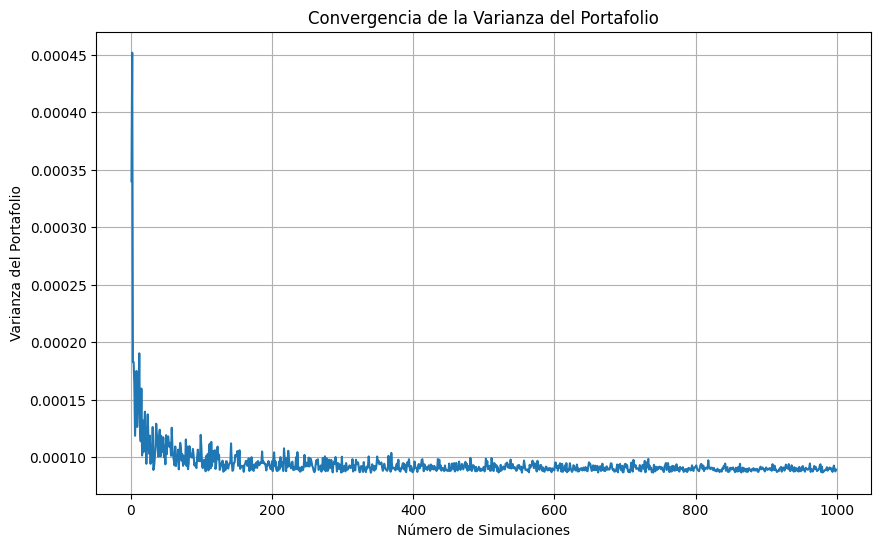

In [103]:
# Gráfica de convergencia de la varianza


plt.figure(figsize=(10, 6))
plt.plot(np.arange(1,1000), varianza_nsims)
plt.xlabel('Número de Simulaciones')
plt.ylabel('Varianza del Portafolio')
plt.title('Convergencia de la Varianza del Portafolio')
plt.grid()
plt.show()


---

### 5.- Portafolio Eficiente en Max Sharpe con Montecarlo

In [120]:
# Identificar variable de decision y su distribucion, generar muestras aleatorias 
np.random.seed(42)  # Para reproducibilidad
# Numero de simulaciones
n_simulacions = 10000

# Generar pesos 
w = np.random.dirichlet(np.ones(n_assets), n_simulacions)

In [121]:
# Definir tasa libre de riesgo 
rf = 0.03/252

In [122]:
# Para cada conjunto de pesos por portafolio, obtener excess return y volatilidad
excess_rets = [w.T @ rets_mean - rf for w in w]
vol = [np.sqrt(w.T @ cov @ w) for w in w]

In [123]:
# Obtener radio de sharpe para todos los portafolios generados
Sharpe_ratio = np.array(excess_rets) / np.array(vol)
Sharpe_ratio

array([0.08232775, 0.06988484, 0.07520012, ..., 0.07251533, 0.07046116,
       0.0656954 ])

In [124]:
# Obtener máximo radio de sharpe
max_sharpe = max(Sharpe_ratio)
max_sharpe

0.08622840846873582

In [125]:
# Obtener pesos del portafolio eficiente en maximo sharpe
pd.DataFrame(Sharpe_ratio)[Sharpe_ratio==max(Sharpe_ratio)]


,0
1933,0.086228


In [129]:
dict(zip(rets.keys(), w[np.argmax(Sharpe_ratio)]))

{'KXI': 0.00028631096049017645,
 'LLY': 0.6022827582321114,
 'MSFT': 0.03322274735994878,
 'NVDA': 0.3642081834474496}

---

### 6.- Consideraciones

> El método de Montecarlo es una **herramienta sumamente robusta para resolver problemas de optimización**, especialmente aquellos que involucran variables aleatorias. Además, es un método ampliamente utilizado en finanzas.

> Aunque **la precisión del método depende directamente de la cantidad de iteraciones realizadas**, este **tiende a aproximarse a una solución cercana al mínimo o máximo global** de la función objetivo, respetando las restricciones impuestas. 

> Este comportamiento puede ser ventajoso o desfavorable según el contexto. En el caso analizado, resulta beneficioso porque permite llegar a una solución cercana al mínimo global, al tiempo que **distribuye las ponderaciones de forma más equilibrada** en comparación con el algoritmo de `scipy.optimize.minimize`. Esta distribución más uniforme de los activos se ajusta mejor a los principios de diversificación, favoreciendo la construcción de portafolios diversificados.



>  El número de iteraciones necesarias para alcanzar la convergencia varía según la complejidad del problema, lo que implica un **alto costo computacional** del método. En particular, el uso intensivo de memoria RAM puede ser un desafío en problemas de alta dimensionalidad.
